<a href="https://colab.research.google.com/github/Jade-P/MLGroupProject/blob/Angry--Arandi/Live_Feed_Face_Detection_(ONLY_JUPYTER_NOTEBOOK)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Capture

This code will **ONLY** work on **jupyter notebook** because google colab does not have the capacity to run a live feed and apply an algorithm. 

**Download modelc.h5 and haarcascade_frontalface_default.xml locally then add path to each file when prompted. Please read below for more details on how to download these two files**

#Download .xml file for face detection

**How to download haarcascade_frontalface_default.xml file (also just general .xml files)** 
1. go to the following link https://github.com/Jade-P/MLGroupProject/blob/main/haarcascade_frontalface_default.xml
Note: this file is provided by the OpenCV github. 

Troubleshooting: The following is where the original .xml file was obtained, if there are any issue with the file from the repository provided, please use this link to obtain the same file, in the same way outlined. https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml 




2. Then go to the 'Raw' file found  by clicking on the "Raw" button found on the right side of the page. This will take you to a web-page. 
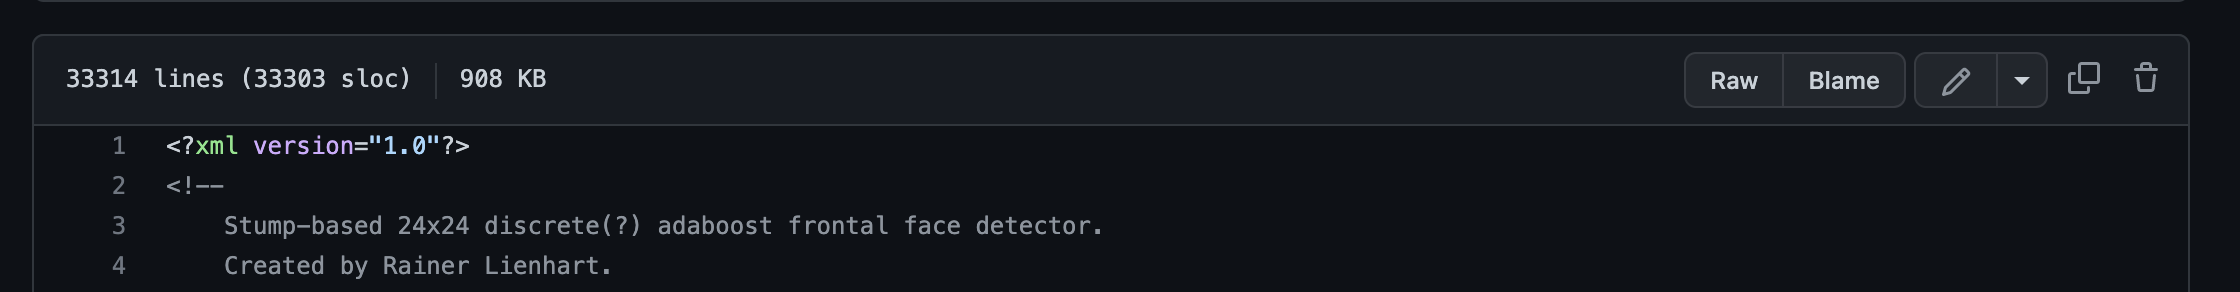

3. Once you are in the webpage with the Raw file, you can right click to "Save As...", shown below. Then save the .xml file locally to your computer. The following image shows you what this file may look like and the options when you right click. 

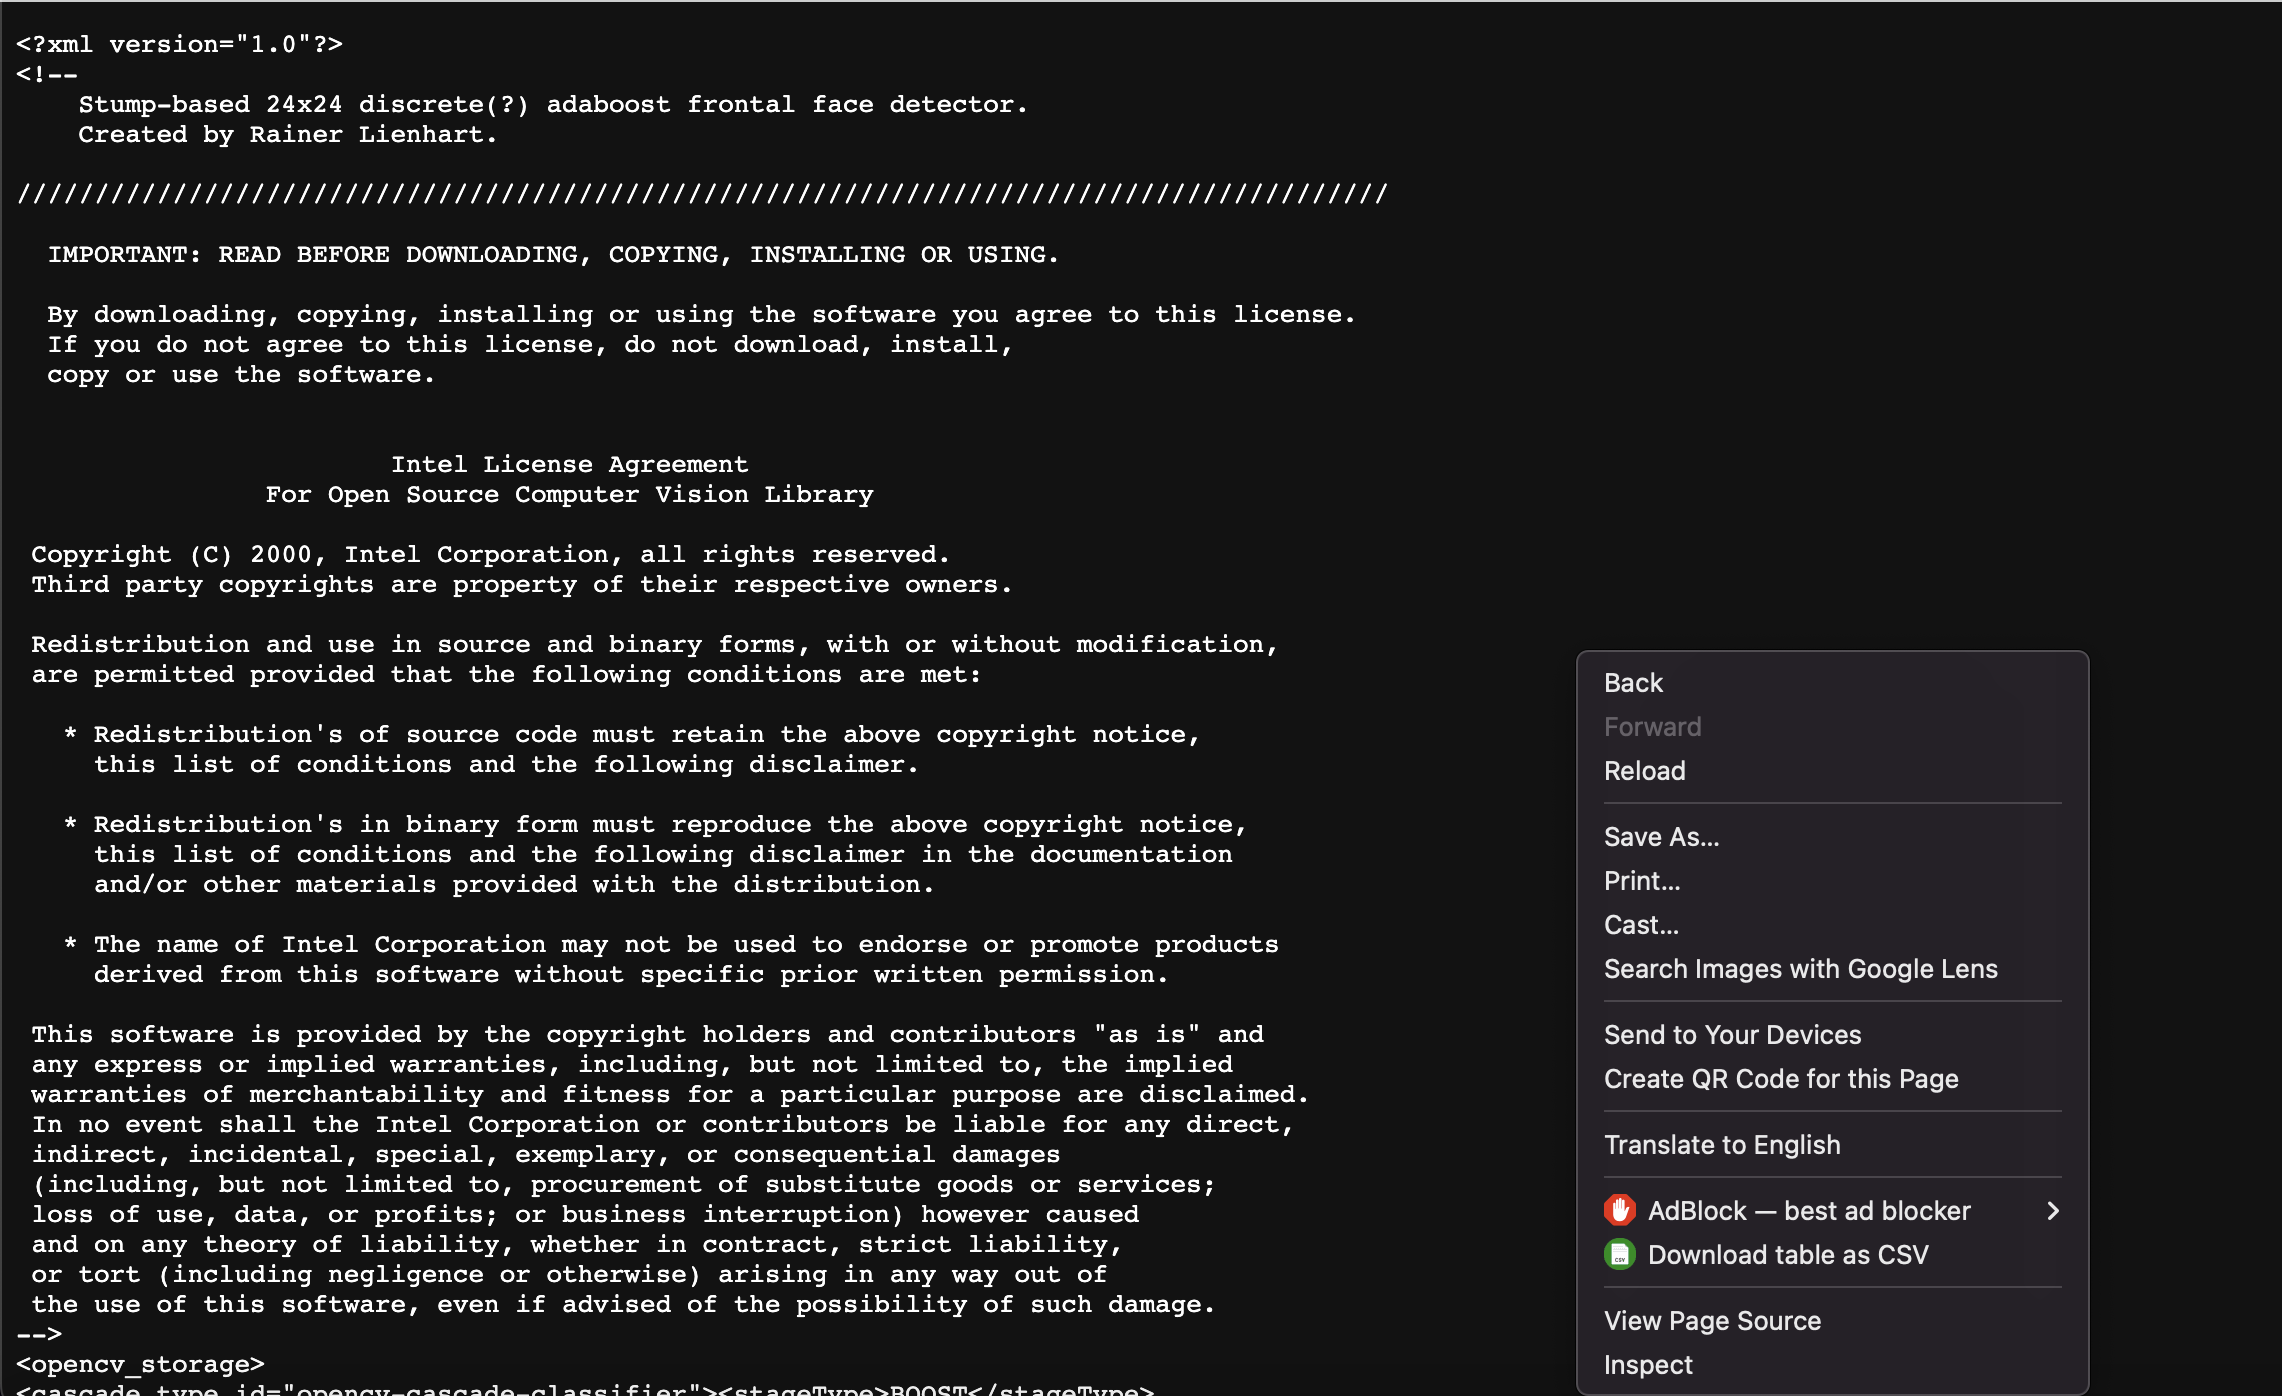


##How to get the model classifier preformed in earlier steps to work with Live Feed Face Detection.ipynb

Note that this notebook by default will use Method One, if you choose to do Method Two you will have to manually comment out code denoted by the comments. 

**Method One**
1. follow this [link](https://drive.google.com/drive/folders/1k6eNUOpjWE-71wlEoz3zmzMlpvBmCItg?usp=sharing) to a google drive (the reason this is not in our repository is because it simply too large because the modelc.h5 contains the completely run data with its weight, and to keep the integreity of the work preformed in the earlier parts of this project this was the best method. 
Link: https://drive.google.com/drive/folders/1k6eNUOpjWE-71wlEoz3zmzMlpvBmCItg?usp=sharing  
2. In this link you will find 'modelc.h5', download this file locally to your machine. The following is an image of what this file looks like and a reference to how to download it: 

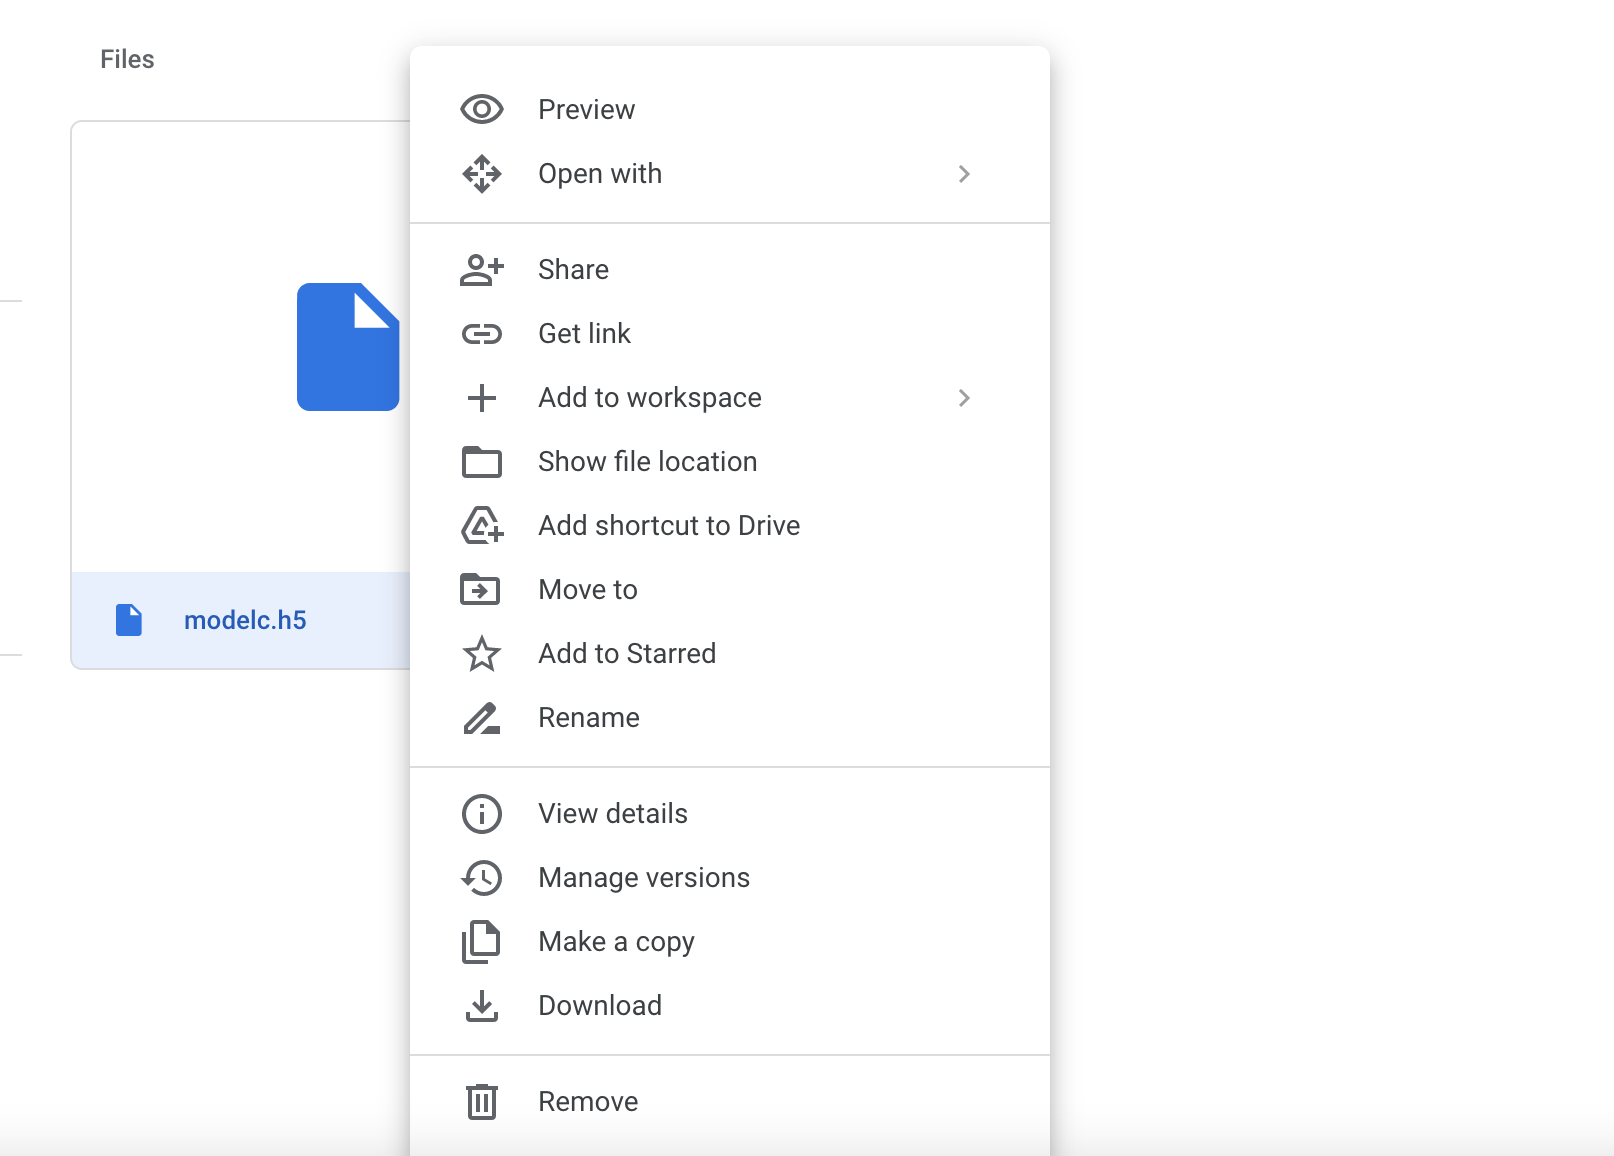

**Method Two**
1. Add this porition of the code to the bottom of the 'CNN_after_Preprocessing.ipynb'
2. Uncomment anything labled as Method One
3. Comment out any code labled as Method Two

In [ ]:
#importing necessary packages
import cv2
import numpy as np

#How to get the model classifier preformed in earlier steps to work with Live Feed Face Detection.ipynb METHOD ONE:
#Use this if you are loading the modelc.h5 file into notebook 
from tensorflow.keras.preprocessing.image import img_to_array

#How to get the model classifier preformed in earlier steps to work with Live Feed Face Detection.ipynb METHOD TWO:
#uncomment if using method two:
#from tensorflow.keras.utils import img_to_array


#Naming Window
cv2.namedWindow("Face Detect")

#Load Model function
from tensorflow.keras.models import load_model


# Importing Model 

**Method ONE: ADD path for .h5 file** \\
comment out this porition if you are using method two 

In [ ]:
#apply path of modelc FOUND IN GITHUB REPOSITORY, DOWNLOAD LOCALLY
path = "/modelc.h5"
model = load_model(path)

In [ ]:
#This will help ensure that you have the corect model 
model.summary()

**Method TWO: ADD path for .h5 file**

In [ ]:
#Un-comment if using method two
#model = modelc

#Importing haarcascade_frontalface_default.xml

**ADD path for XML file**

In [ ]:
#intializing Classifier 

#apply path of haarcascade_frontalface_default.xml FOUND IN GITHUB REPOSITORY, DOWNLOAD LOCALLY
path_ ='/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path_)

# Applying Model to Video Capture

In [ ]:
#Labels for the square to output
emotion_labels = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

#This is initializing the video capture
# '0' is getting the videocapture from your local machine 
cap = cv2.VideoCapture(0)

while(True):
    #this is getting each frame
    ret,frame = cap.read()
    labels = []
    #converting to gray scale 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #finding the faces from the classifier 
    faces =face_cascade.detectMultiScale(gray, 1.1, 4)
    #the following will apply to a found face 
    for (x,y,w,h) in faces:
        #preprocessing data
        color = (0, 255, 0)# this is BGR
        stroke = 2 #how thick the line is 
        cv2.rectangle(frame, (x,y),(x+w, y+h), color , stroke) #draws the rectangle
        roi_gray = gray[y:y+h, x:x+w] #getting cordinates of faces
        roi_gray = cv2.resize(roi_gray, (48,48), interpolation = cv2.INTER_AREA) #converting becasue the model needs a 48x48 image
        
        #recognize --- add Deep Learning model 
        if np.sum([roi_gray])!= 0: #insuring that a face is there
            roi = roi_gray.astype('float')/255.0  
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)
            
            #adding model
            classifier = model
            prediction = classifier.predict(roi)[0] #applying model
            label = emotion_labels[prediction.argmax()] #labeling model 
            label_pos = (x,y-10) #where the label will be 
            cv2.putText(frame, label, label_pos, cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),stroke) #outputting labels to model
        else:
            #If no face is there
            cv2.putText(frame, "Can't Detect Emotion", (30,80), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),stroke)
    #Shows the found lables and frame 
    cv2.imshow('Emotion Detector', frame)
    #displays the resulting frame, and when user presses 'q' the feed will end
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#Ending capture
cap.release
cv2.destroyAllWindows()
exit()